In [4]:
import cv2
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from sklearn.metrics import accuracy_score

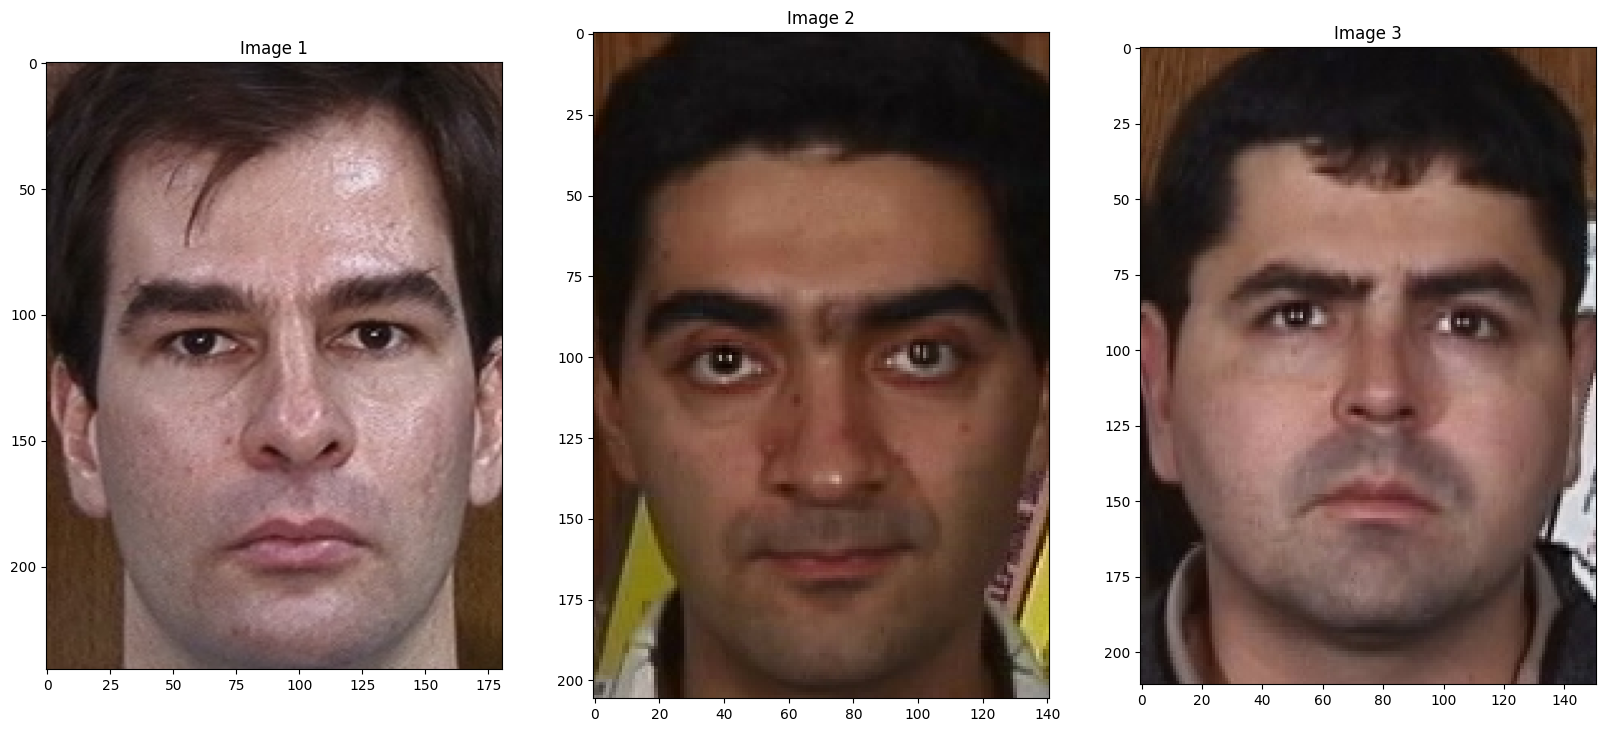

In [5]:
img_1 = cv2.imread('imagens/cropped_faces/s01_01.jpg')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

img_2 = cv2.imread('imagens/cropped_faces/s02_12.jpg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

img_3 = cv2.imread('imagens/cropped_faces/s03_13.jpg')
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

# plt.subplot(131)
# plt.imshow(img_1)
# plt.title('Image 1')

# plt.subplot(132)
# plt.imshow(img_2)
# plt.title('Image 2')

# plt.subplot(133)
# plt.imshow(img_3)
# plt.title('Image 3')

for img in range(3):
    plt.subplot(1, 3, img+1)
    plt.imshow(eval(f'img_{img+1}'))
    plt.title(f'Image {img+1}')

In [6]:
img_1.shape, img_2.shape, img_3.shape

((241, 181, 3), (206, 141, 3), (211, 151, 3))

In [7]:
# check structs for learning

path_dirs = {}
for path in [
    pathlib.Path('imagens/cropped_faces'),
    pathlib.Path('imagens/treino'),
    pathlib.Path('imagens/teste')]:
    path_dirs[path.name] = list(path.glob('*.jpg'))
    
for path in path_dirs:
    print(path, len(path_dirs[path]))

cropped_faces 750
treino 500
teste 250


In [8]:
interpolation = lambda img: cv2.resize(img, (200, 200), interpolation=cv2.INTER_LANCZOS4)
default_imgs = lambda imgs: [interpolation(cv2.imread(img, cv2.IMREAD_GRAYSCALE)) for img in imgs]

In [9]:
subjects_train_names = [int(img.name[1:3]) for img in path_dirs['treino']]
subjects_test_names = [int(img.name[1:3]) for img in path_dirs['teste']]

In [10]:
subjects_train = np.asarray(subjects_train_names, dtype=np.int32)
subjects_test = np.asarray(subjects_test_names, dtype=np.int32)
data_train = np.array(default_imgs(path_dirs['treino']), dtype=np.int32)

len(subjects_train), len(subjects_test),subjects_train_names[0], subjects_test_names[0], len(data_train), data_train[0]

(500,
 250,
 7,
 8,
 500,
 array([[ 47,  48,  49, ...,  36,  36,  37],
        [ 51,  52,  52, ...,  43,  44,  44],
        [ 55,  53,  52, ...,  46,  46,  47],
        ...,
        [ 80,  79,  76, ...,  84, 100, 139],
        [ 79,  78,  77, ...,  66, 119, 182],
        [ 76,  78,  81, ...,  66, 143, 208]], dtype=int32))

In [11]:
model_eingen_faces = cv2.face.EigenFaceRecognizer_create()

In [12]:
model_eingen_faces.train(data_train, subjects_train)

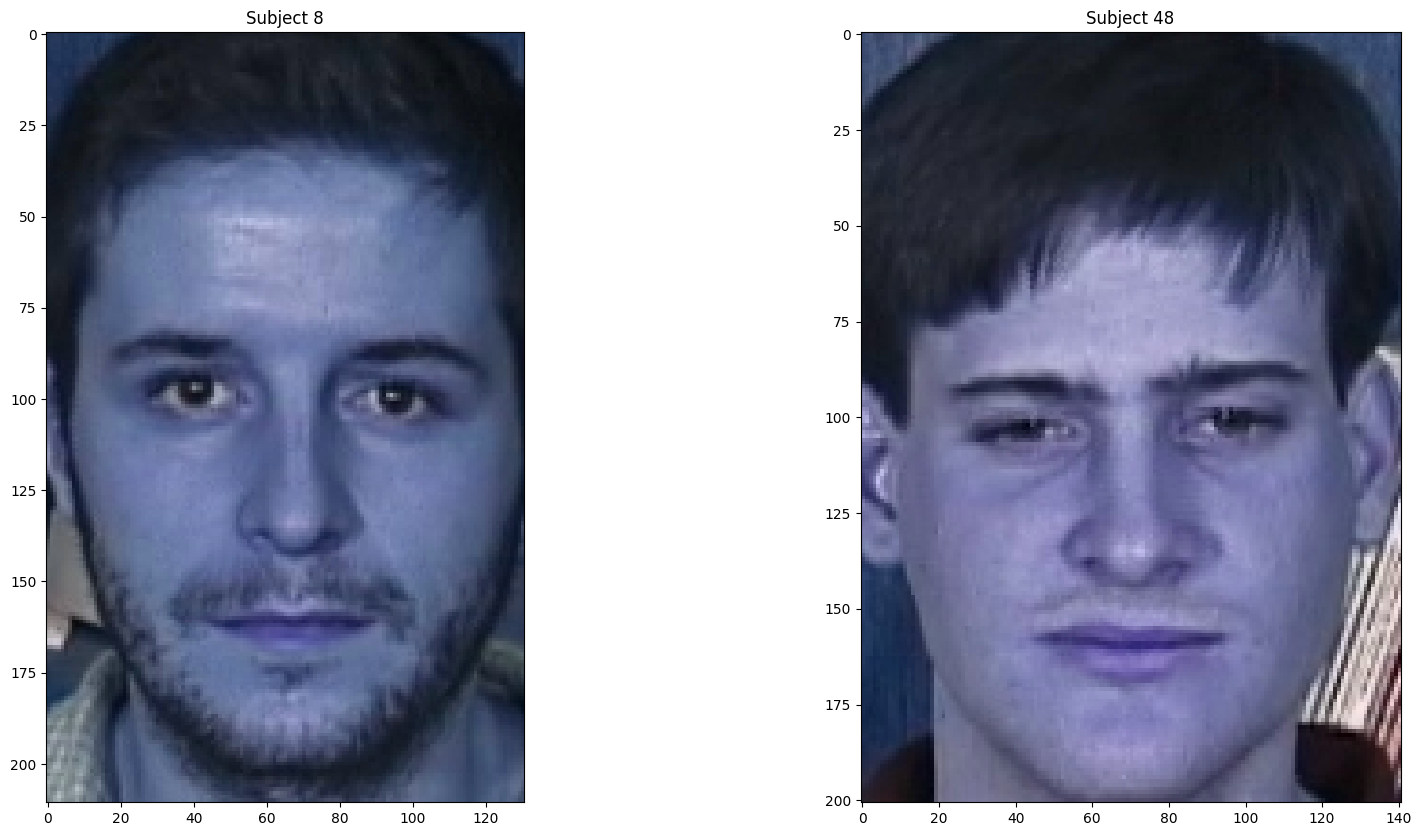

In [13]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title(f"Subject {subjects_test[0]}")
plt.imshow(cv2.imread(str(path_dirs['teste'][0])), cmap="gray")

plt.subplot(122)
plt.title(f"Subject {subjects_test[1]}")
plt.imshow(cv2.imread(str(path_dirs['teste'][1])), cmap="gray")

plt.show()

In [14]:
model_eingen_faces.predict(data_train[0]), model_eingen_faces.predict(data_train[1])

((7, 0.0), (29, 0.0))

In [15]:
model_fisher_faces = cv2.face.FisherFaceRecognizer_create()

In [16]:
model_fisher_faces.train(data_train, subjects_train)

In [17]:
model_fisher_faces.predict(data_train[0]), model_fisher_faces.predict(data_train[1])

((7, 0.0), (29, 0.0))

In [18]:
model_lbph_faces = cv2.face.LBPHFaceRecognizer_create()

In [19]:
model_lbph_faces.train(data_train, subjects_train)

In [20]:
model_lbph_faces.predict(data_train[0]), model_lbph_faces.predict(data_train[1])

((7, 0.0), (29, 0.0))

In [21]:
accuracy_prediction = []
for data, subject in zip(data_train, subjects_train):
    accuracy_prediction.append(
        {
            'eigen': model_eingen_faces.predict(data),
            'fisher': model_fisher_faces.predict(data),
            'lbph': model_lbph_faces.predict(data),
            'img': subject
        }
    )

In [22]:
accuracy_prediction[0]

{'eigen': (7, 0.0), 'fisher': (7, 0.0), 'lbph': (7, 0.0), 'img': 7}